## Cargar datos

from google.colab import drive
drive.mount('/content/drive')

In [29]:
data_dir = "images/"

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.25  
)

In [31]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  
    subset='training'  
)

Found 4785 images belonging to 16 classes.


In [32]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=512,
    class_mode='categorical',
    subset='validation'  
)

Found 1594 images belonging to 16 classes.


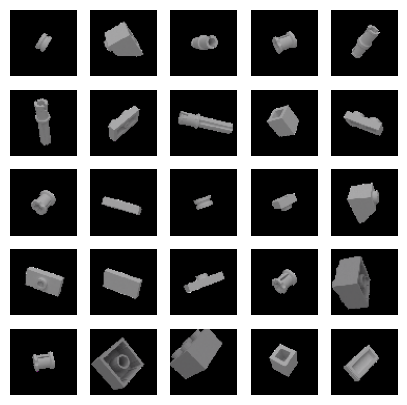

In [33]:
fig, axes = plt.subplots(5, 5, figsize=(5, 5))


for i in range(5):
    for j in range(5):

        batch = next(train_generator)
        images, _ = batch


        ax = axes[i, j]
        ax.imshow(images[0]) 
        ax.axis('off') 

### Deep Learning

In [34]:
batch = next(train_generator)

images, labels = batch


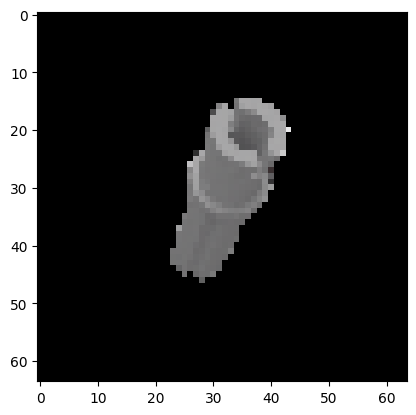

In [35]:
plt.imshow(images[0])

In [36]:
modelo = Sequential()
modelo.add(Dense(128, input_shape=(64, 64, 3), activation='relu'))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dense(32, activation='relu'))


modelo.add(Flatten())


modelo.summary()


output = modelo.layers[0](images[0])
output = modelo.layers[1](output)


flatten_output = modelo.layers[-1](output)

vector_aplanado = flatten_output.numpy()

print(vector_aplanado.shape)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 64, 64, 128)       512       
                                                                 
 dense_61 (Dense)            (None, 64, 64, 64)        8256      
                                                                 
 dense_62 (Dense)            (None, 64, 64, 32)        2080      
                                                                 
 flatten_21 (Flatten)        (None, 131072)            0         
                                                                 
Total params: 10848 (42.38 KB)
Trainable params: 10848 (42.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
(64, 4096)


In [39]:
modelo = Sequential([
    Dense(128, input_shape=(64, 64, 3), activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='softmax'),
    Flatten()
])


output = modelo.layers[0](images[0])
output = modelo.layers[1](output)
output = modelo.layers[2](output)


flatten_output = modelo.layers[3](output)
vector_output = flatten_output.numpy()

print(images[0].shape)
print(vector_output.shape)

modelo.summary()

(64, 64, 3)
(64, 1024)
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 64, 64, 128)       512       
                                                                 
 dense_69 (Dense)            (None, 64, 64, 64)        8256      
                                                                 
 dense_70 (Dense)            (None, 64, 64, 16)        1040      
                                                                 
 flatten_26 (Flatten)        (None, 65536)             0         
                                                                 
Total params: 9808 (38.31 KB)
Trainable params: 9808 (38.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
